In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model


# Model = VGG16
# model = Model(weights="imagenet")
model = load_model('../models/standard_model_preprocessed.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 96, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 23, 23, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 128)      

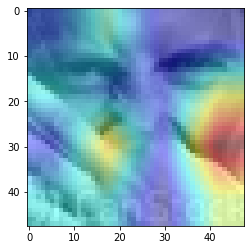

In [4]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import numpy as np
from keras_conv_visualization.gradcam import GradCAM

# img_path = '../keras_grad_cam/images/beagle.jpg'
img_path = '../data/histogram_stretched/train/1/2625.png'
cam = GradCAM(model)
# load the input image from disk (in Keras/TensorFlow format) and preprocess it
image = load_img(img_path, target_size=(96, 96), color_mode='grayscale')
image = img_to_array(image)
image /= 255
# image = imagenet_utils.preprocess_input(image)
heatmap, output = cam.make_superimposed_img(image, img_path, alpha=0.6)
import matplotlib.pyplot as plt
plt.imshow(output)